# Effects of Car Features on Price
## by Robert Bruton

## Investigation Overview

The goal of this project was to look at the relationships between car features and price and determine which features had the greatest effect on value.

## Dataset Overview

The dataset for this project was compiled from data originally scraped from Edmunds and Twitter. The dataset contains 16 columns of variables for nearly 12,000 rows of vehicles. The features contained in the columns include some numeric variables (production year, horsepower, highway gas mileage, city gas mileage, popularity, and price) and some categorical variables (fuel type, number of engine cylinders, transmission type, drive wheels, number of doors, vehicle size, and body style), as well as columns of strings specifying the vehicle model and the vehicle class (both of which were ignored). The dataset was cleaned for quality prior to analysis by dropping unnecessary columns and any rows with important missing values. The cleaned data set contained 15 columns and 9197 entries with vehicles from 2001 to 2017 ranging in price from $5,000 to $75,000 dollars.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe (use cleaned dataset instead of original)

cars = pd.read_csv('cars_final.csv')

## Distribution of Vehicle Prices

The prices of vehicles in the dataset have a large range from $5,000 to $75,000. The distribution is unimodal with a median of $31,040. The distribution is skewed right and has a mean of $33,420.

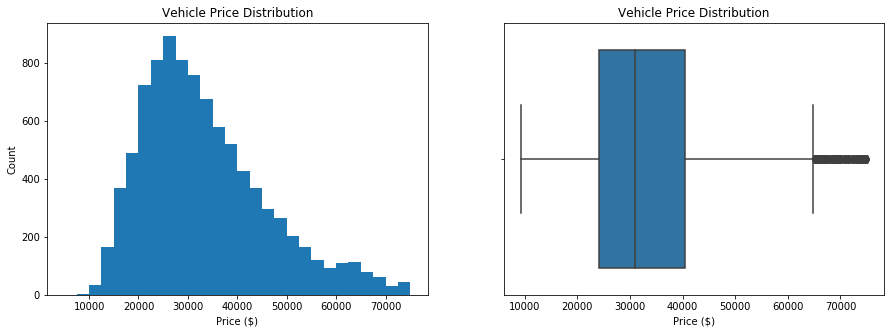

In [16]:
# Plot histogram and boxplot of price distribution

plt.figure(figsize=[15, 5])

bins=np.arange(5000, 77500, 2500)
plt.subplot(1,2,1)
plt.hist(data=cars, x='price', bins=bins)
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.title('Vehicle Price Distribution')

plt.subplot(1,2,2)
sb.boxplot(cars.price)
plt.title('Vehicle Price Distribution')
plt.xlabel('Price ($)');

## Price vs Horsepower

The feature most closely correlated with vehicle price is the horsepower. These variables had a correlation coefficient of 0.781. 

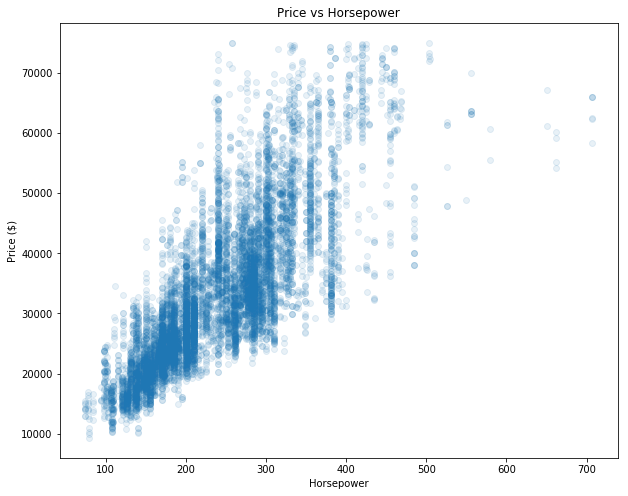

In [19]:
# Scatterplot of price vs horsepower

plt.figure(figsize = [10, 8])
plt.scatter(data=cars, x='hp', y='price', alpha = 0.1)
plt.xlabel('Horsepower')
plt.ylabel('Price ($)')
plt.title('Price vs Horsepower');

## (Visualization 3)



> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!